# Let us read multiple csv files, one for each month.
# Then put them all in one single dataframe.

In [3]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Is there climate change in the near future?
# Are there more frequent extreme events, like excessive rainfall?
# Anything special during COVID19 years?
# You can look at other quantities like min/max temperatures, etc.

In [5]:
# You are provided with monthly data from January 1980 to January 2025.
# Define the year and month for the names of the csv files. The format is YYYYMM.

# One way is to use range(YYYY01, YYYY13) for all months of that year YYYY.
# The itertools.chain would concatenate all of them into one single list. Print out the list to view it.

ListOfMonths1 = list(itertools.chain(range(198001, 198013), range(198101, 198113), range(198201, 198213),
                                     range(198301, 198313), range(198401, 198413), range(198501, 198513),
                                     range(198601, 198613), range(198701, 198713), range(198801, 198813),
                                     range(198901, 198913), range(199001, 199013), range(199101, 199113),
                                     range(199201, 199213), range(199301, 199313), range(199401, 199413),
                                     range(199501, 199513), range(199601, 199613), range(199701, 199713),
                                     range(199801, 199813), range(199901, 199913), range(200001, 200013),
                                     range(200101, 200113), range(200201, 200213), range(200301, 200313),
                                     range(200401, 200413), range(200501, 200513), range(200601, 200613),
                                     range(200701, 200713), range(200801, 200813), range(200901, 200913),
                                     range(201001, 201013), range(201101, 201113), range(201201, 201213),
                                     range(201301, 201313), range(201401, 201413), range(201501, 201513),
                                     range(201601, 201613), range(201701, 201713), range(201801, 201813),
                                     range(201901, 201913), range(202001, 202013), range(202101, 202113),
                                     range(202201, 202213), range(202301, 202313), range(202401, 202413),
                                     range(202501, 202502)))

# Alternatively, this is a nested loop.
# This uses the built-in string function zfill to append 0 to an integer of desired length.
# E.g. the integer 1 to become the string '01'.

ListOfMonths2 = [int(str(YYYY) + str(MM).zfill(2)) for YYYY in range(1980, 2026) for MM in range(1, 13)]

# Delete February to December of 2025, since we only have January 2025 ...
ListOfMonths2 = ListOfMonths2[:-11]

### Are they the same?
print(ListOfMonths1 == ListOfMonths2)

# Okay, let us just use one of them.
ListOfMonths = ListOfMonths1

True


In [7]:
# List comprehension to read each csv file with the given YYYYMM, and appending that dataframe into a list.
# So you have a list of all the data frames for each YYYYMM.
ListOfDF = [pd.read_csv(f'Raw Data/DAILYDATA_S24_{element}.csv') for element in ListOfMonths]

# This will create a single dataframe, concatenating all of them.
df = pd.concat(ListOfDF)

# Replace '—' and '-' with NaN.
df.replace(['—', '-'], np.NaN, inplace=True)

# Let us take a look at your combined (rather, concatenated) dataframe!
df

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),\,Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm)
0,Changi,1980,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Changi,1980,1,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Changi,1980,1,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Changi,1980,1,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Changi,1980,1,5,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Changi,2025,1,27,11.0,NaN,NaN,NaN,25.3,29.5,23.2,12.9,40.7,NaN,3.6,4.4,6.4
27,Changi,2025,1,28,0.0,NaN,NaN,NaN,26.6,29.6,25.3,20.7,51.9,NaN,0.0,0.0,0.0
28,Changi,2025,1,29,0.0,NaN,NaN,NaN,26.4,29.2,24.9,20.1,57.4,NaN,0.0,0.0,0.0
29,Changi,2025,1,30,0.0,NaN,NaN,NaN,26.6,30.3,24.1,17.1,51.9,NaN,0.0,0.0,0.0


# We are dealing with time series. Let us set our datetime index.

In [9]:
# Let us create a datetime object using the year, month and day columns, and set that as the index of the dataframe.
df.set_index(pd.to_datetime(df[['Year', 'Month', 'Day']]), inplace=True)

# As a start, let us investigate these three quantities.
df = df[['Daily Rainfall Total (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)']]

# Set data types as float.
# Otherwise the "-" values replaced by "NaN" may make the data type as non-numeric and cannot be plotted.
df = df.astype(float)

# Only run this cell once.
# If you run it again, df no longer has the year, month and date columns to set the index ...

# Let us print out our simpler and better organised dataframe!
df

,Daily Rainfall Total (mm),Mean Temperature (°C),Mean Wind Speed (km/h)
1980-01-01,0.0,NaN,NaN
1980-01-02,0.0,NaN,NaN
1980-01-03,0.0,NaN,NaN
1980-01-04,0.0,NaN,NaN
1980-01-05,8.0,NaN,NaN
...,...,...,...
2025-01-27,11.0,25.3,12.9
2025-01-28,0.0,26.6,20.7
2025-01-29,0.0,26.4,20.1
2025-01-30,0.0,26.6,17.1


# <i><b><s>Very basic</s></b></i> EDA.

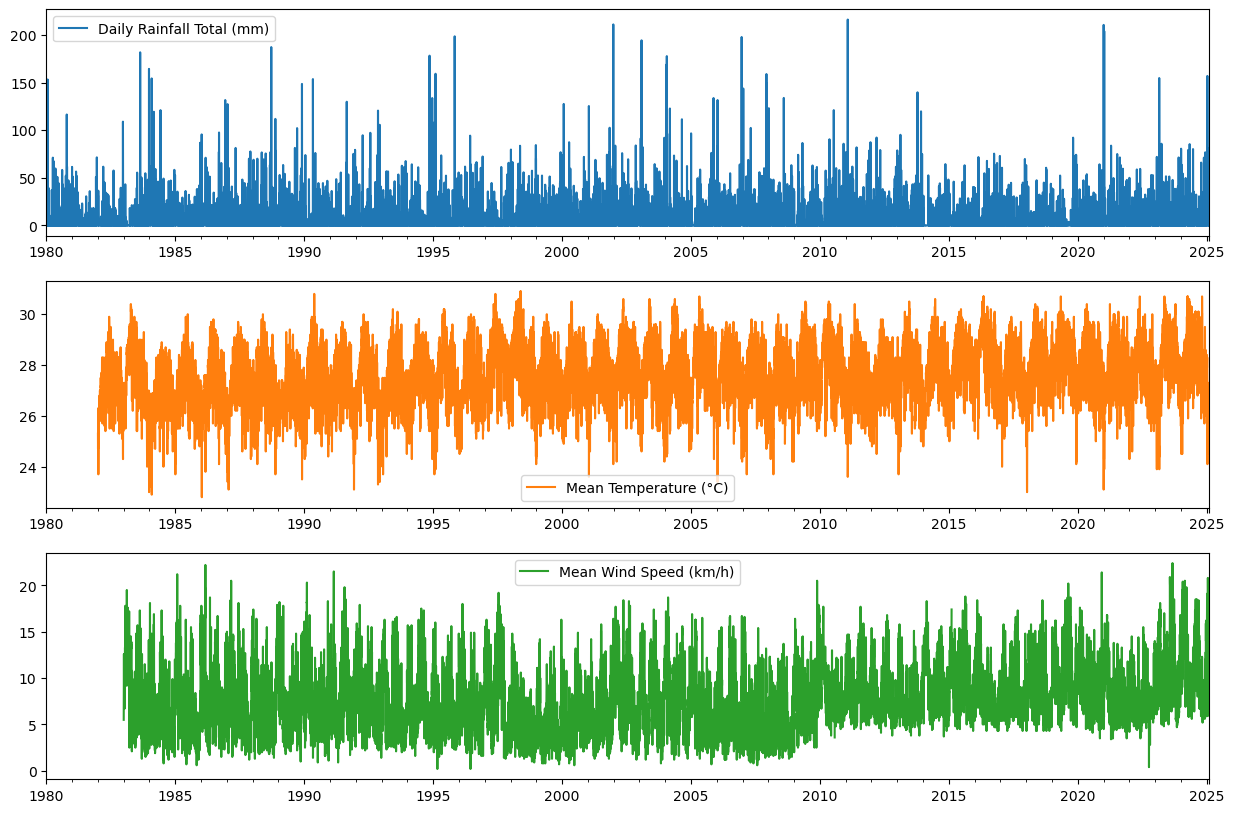

In [11]:
# Some plots of the raw data.

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

In [12]:
# Check for missing values
df.isnull().sum()

Daily Rainfall Total (mm)       0
Mean Temperature (°C)         731
Mean Wind Speed (km/h)       1108
dtype: int64

In [17]:
# How about resampling, would that smoothen out the fluctuations?
# Or how about looking within a smaller time frame?

# Let us try smaller time frame first, this is easier.



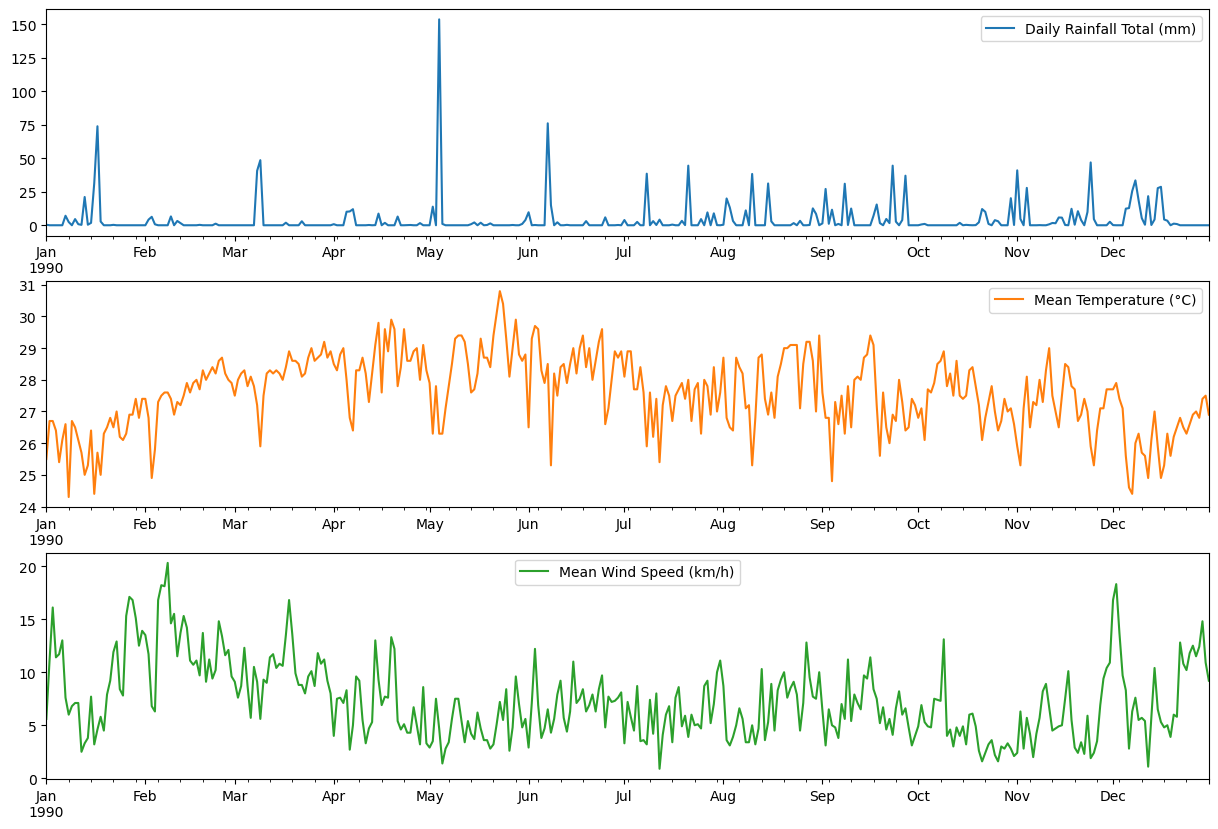

In [20]:
# Just one year.

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df[['Daily Rainfall Total (mm)']]['1990':'1990'].plot(ax=ax[0])
df[['Mean Temperature (°C)']]['1990':'1990'].plot(ax=ax[1], c='C1')
df[['Mean Wind Speed (km/h)']]['1990':'1990'].plot(ax=ax[2], c='C2')
plt.show()

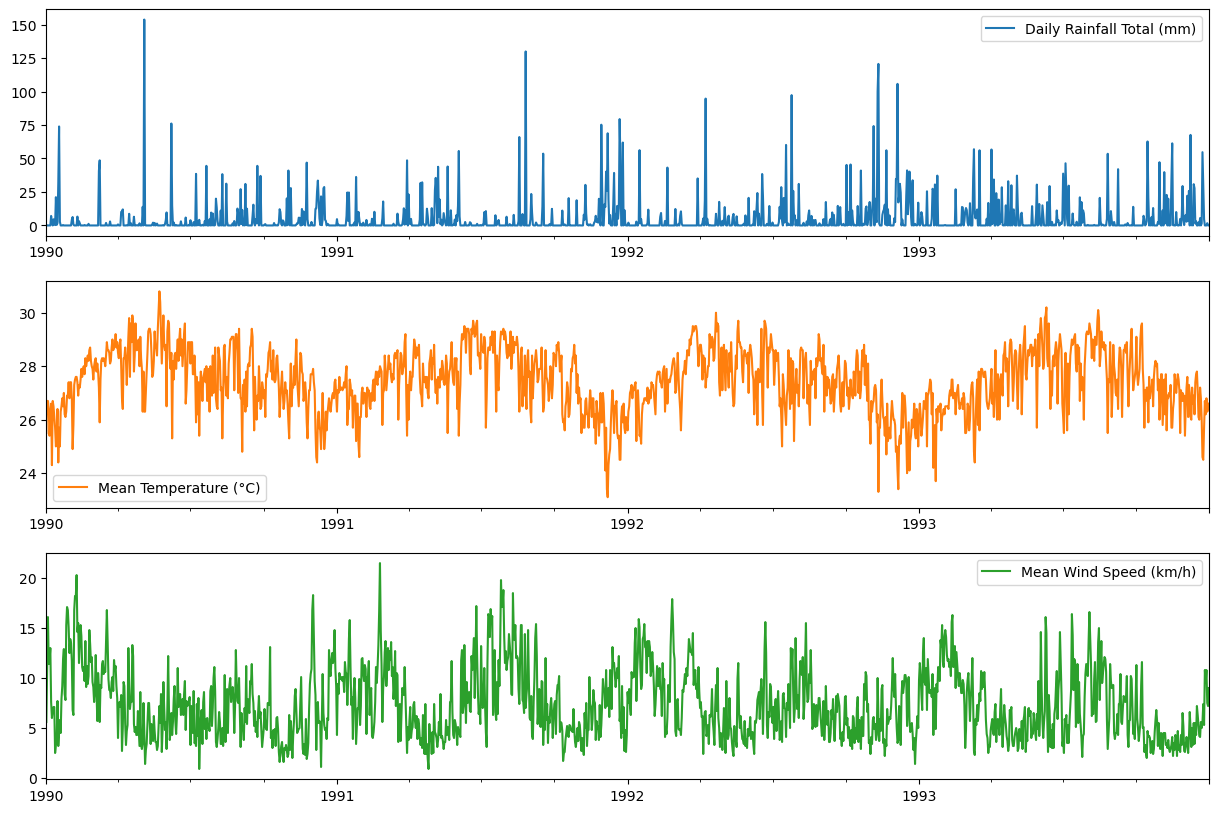

In [22]:
# How about over four years?
# Maybe ENSO? La Nini, El Nino southern oscillation? How often do they recur?

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df[['Daily Rainfall Total (mm)']]['1990':'1993'].plot(ax=ax[0])
df[['Mean Temperature (°C)']]['1990':'1993'].plot(ax=ax[1], c='C1')
df[['Mean Wind Speed (km/h)']]['1990':'1993'].plot(ax=ax[2], c='C2')
plt.show()

# Fine, time for resampling.

In [25]:
df_weekly = df.resample('W').mean()
df_monthly = df.resample('M').mean()
df_monthly

C:\Users\sandy\AppData\Local\Temp\ipykernel_17916\1312738012.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


,Daily Rainfall Total (mm),Mean Temperature (°C),Mean Wind Speed (km/h)
1980-01-31,9.874194,NaN,NaN
1980-02-29,2.689655,NaN,NaN
1980-03-31,2.054839,NaN,NaN
1980-04-30,7.543333,NaN,NaN
1980-05-31,4.890323,NaN,NaN
...,...,...,...
2024-09-30,4.080000,28.756667,11.056667
2024-10-31,4.761290,28.541935,8.541935
2024-11-30,13.580000,27.356667,7.206667
2024-12-31,7.561290,27.658065,10.777419


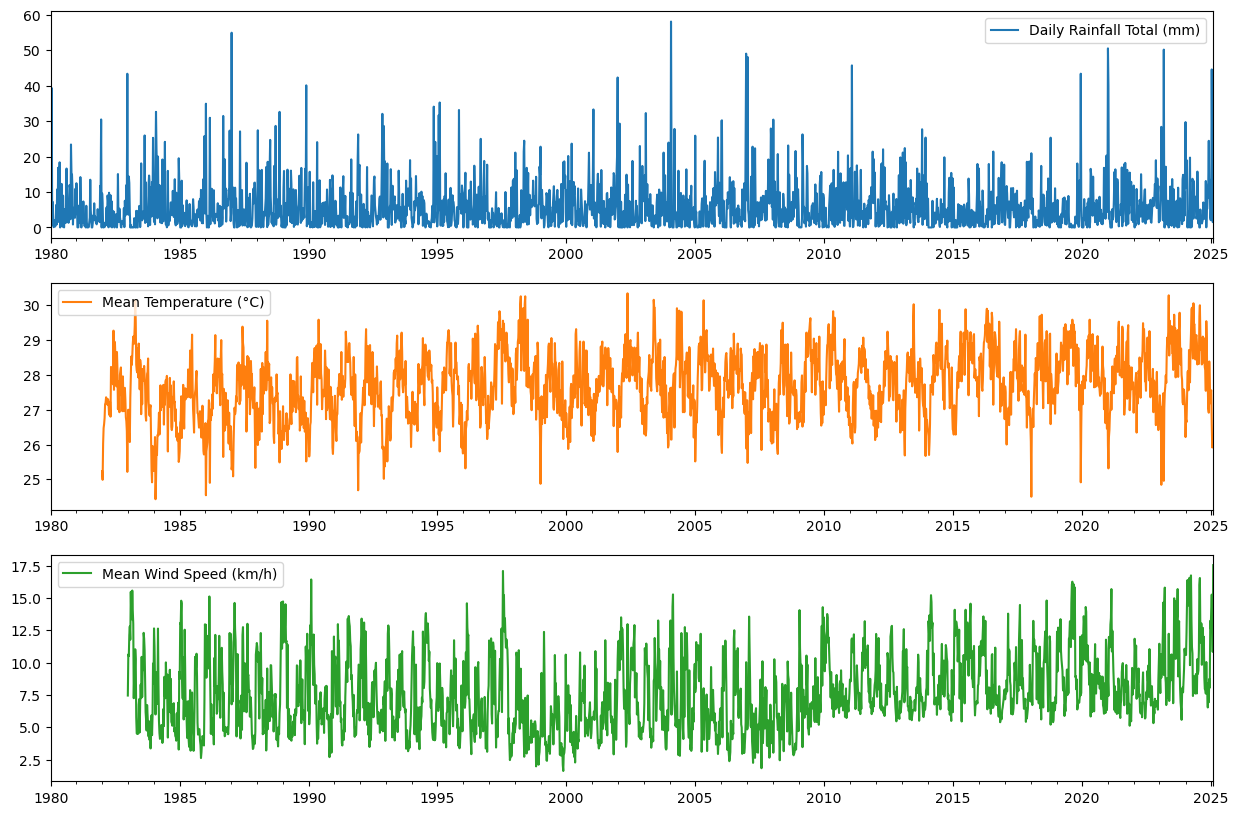

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df_weekly[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df_weekly[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df_weekly[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

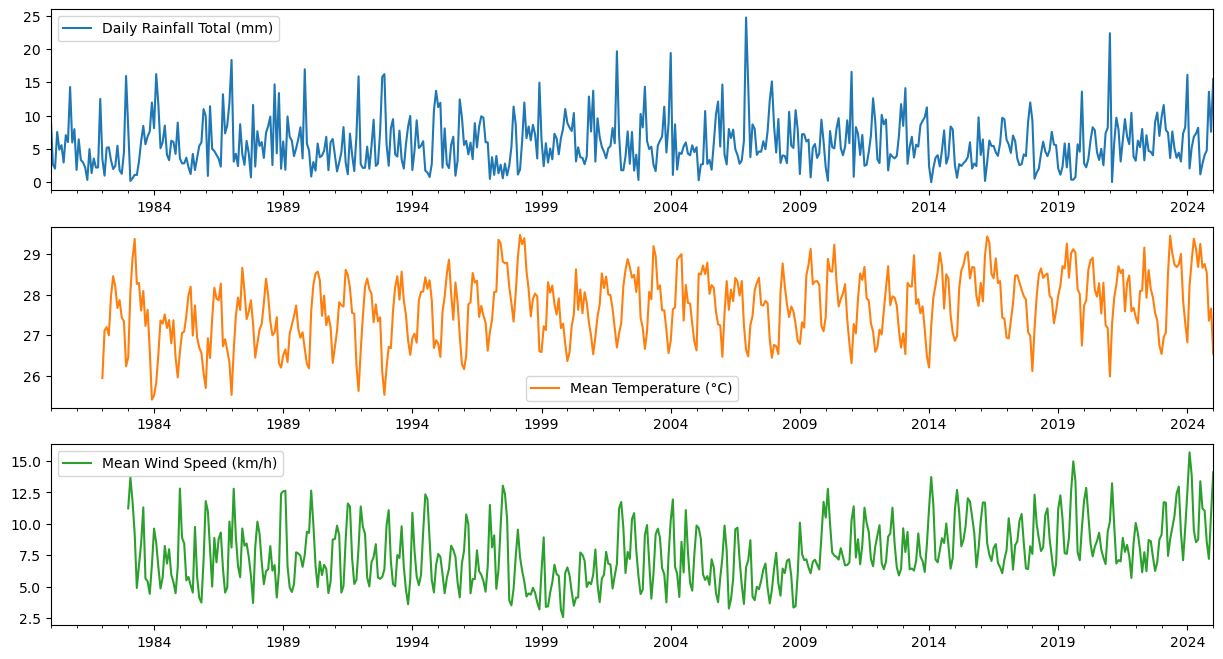

In [29]:
fig, ax = plt.subplots(3, 1, figsize=(15, 8))

df_monthly[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df_monthly[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df_monthly[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

# Bonus ... taking diff of rainfall and plotting it ... visual check of stationarity.

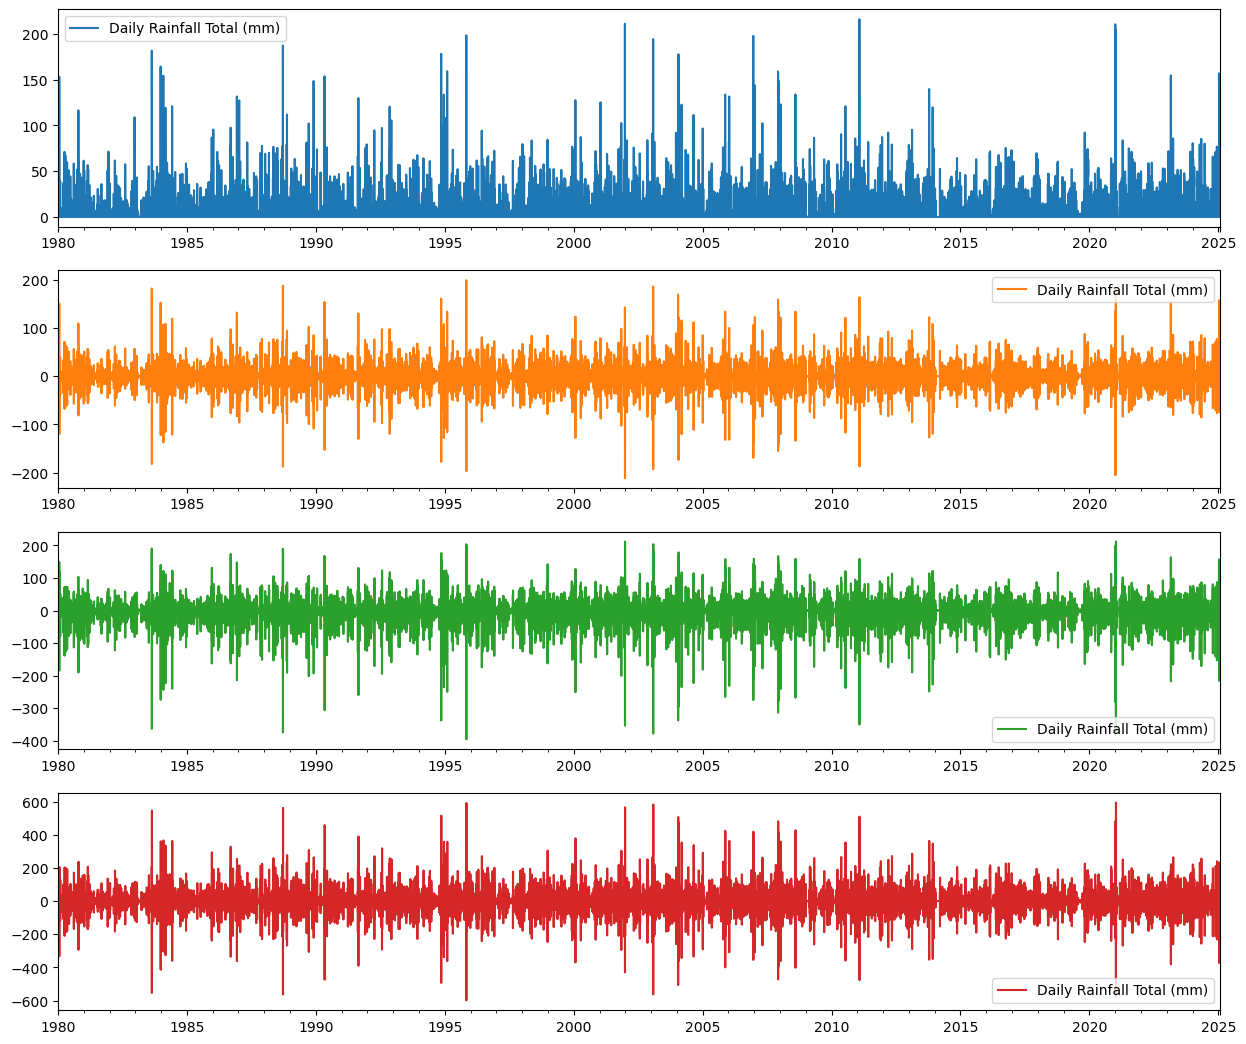

In [32]:
fig, ax = plt.subplots(4, 1, figsize=(15, 13))
df[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df[['Daily Rainfall Total (mm)']].diff().plot(ax=ax[1], c='C1')
df[['Daily Rainfall Total (mm)']].diff().diff().plot(ax=ax[2], c='C2')
df[['Daily Rainfall Total (mm)']].diff().diff().diff().plot(ax=ax[3], c='C3')
plt.show()

# Of course, these are just plots. Do the relevant test!

# End of example starter code. Have fun!

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
# Augmented Dickey-Fuller Test 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.tools import diff 


from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import warnings



In [97]:
#1990 onwards
df_monthly_1990 = df_monthly[df_monthly.index >= '1990-01']
df_monthly_1990.shape


(421, 3)

array([<Axes: >, <Axes: >], dtype=object)

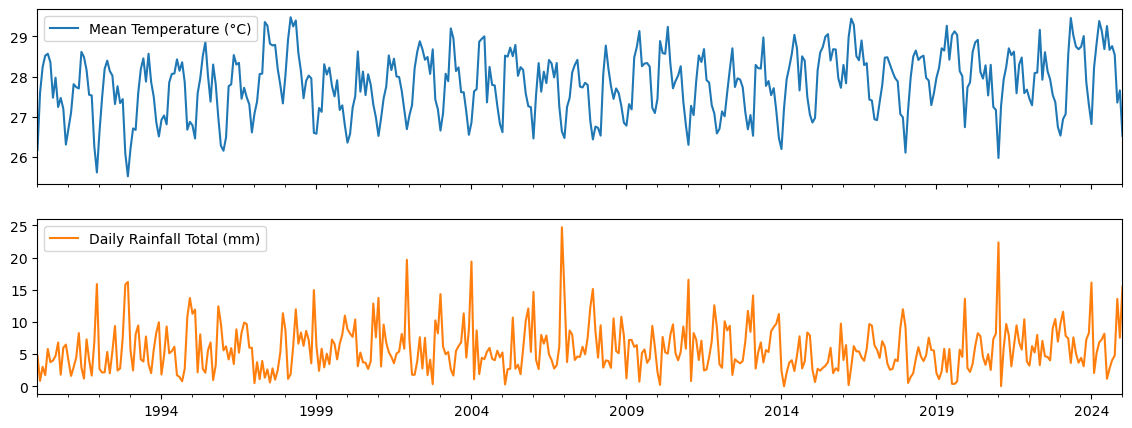

In [99]:
df_monthly_1990[['Mean Temperature (°C)','Daily Rainfall Total (mm)']].plot(subplots=True, figsize=(14,5))


In [41]:
# Check for missing values
df_monthly_1990.isnull().sum()

Daily Rainfall Total (mm)    0
Mean Temperature (°C)        0
Mean Wind Speed (km/h)       0
dtype: int64

# Check for Stationarity

In [44]:
result1= adfuller(df_monthly_1990['Daily Rainfall Total (mm)']) 
print(f'Daily Rainfall p-value: {result1[1]:.4f}') 

result2= adfuller(df_monthly_1990['Mean Temperature (°C)']) 
print(f'Mean Temperature p-value: {result2[1]:.4f}') 

Daily Rainfall p-value: 0.0004
Mean Temperature p-value: 0.0000


In [46]:
#P-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

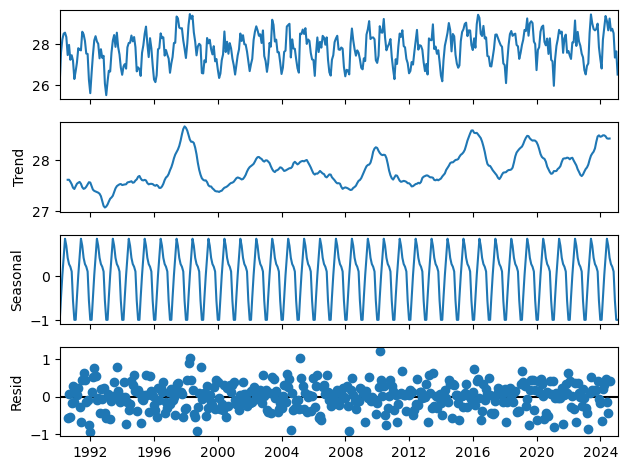

In [48]:
result = seasonal_decompose(df_monthly_1990[['Mean Temperature (°C)']], model='additive')
result.plot()
plt.show()

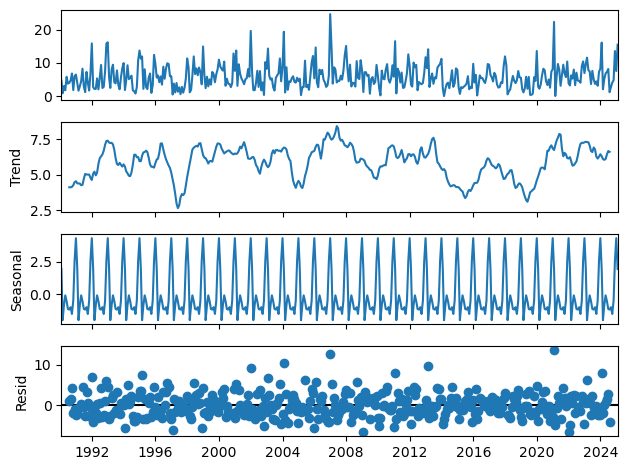

In [50]:
result = seasonal_decompose(df_monthly_1990[['Daily Rainfall Total (mm)']], model='additive')
result.plot()
plt.show()

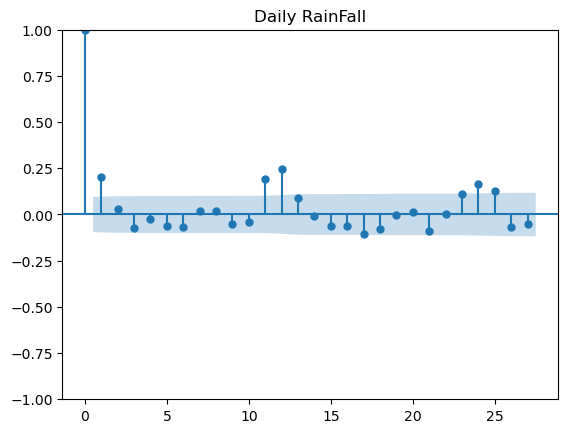

In [58]:
# try to plot acf
plot_acf(df_monthly_1990[['Daily Rainfall Total (mm)']])
plt.title('Daily RainFall')
plt.show()

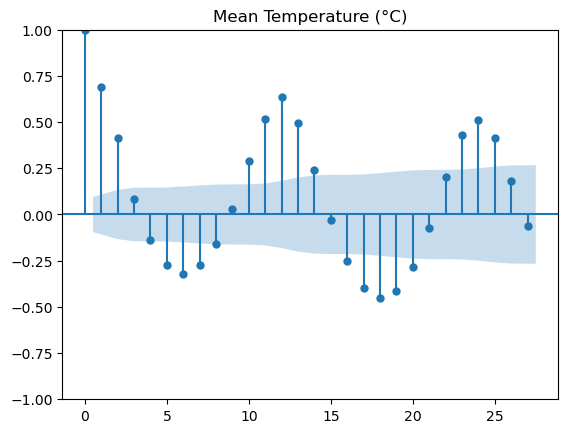

In [60]:
# try to plot acf
plot_acf(df_monthly_1990[['Mean Temperature (°C)']])
plt.title('Mean Temperature (°C)')
plt.show()

In [62]:
##Scenario A: 10 Year Training, 3 year test
train_10y     = df_monthly_1990.loc['1990':'1999'].copy()
test_data_3y  = df_monthly_1990.loc['2000':'2002'].copy()
##Scenario B: 20 year Training, 3 year test
train_20y     = df_monthly_1990.loc['1990':'2009'].copy()
test_data_3y2 = df_monthly_1990.loc['2010':'2012'].copy()


In [64]:
#Scenario B: 20 Year Training, 3 year test
print(train_10y.shape)
test_data_3y.shape

(120, 3)


(36, 3)

In [66]:
#Scenario B: 20 Year Training, 3 year test
print(train_20y.shape)
print(test_data_3y2.shape)

(240, 3)
(36, 3)


## Temperature

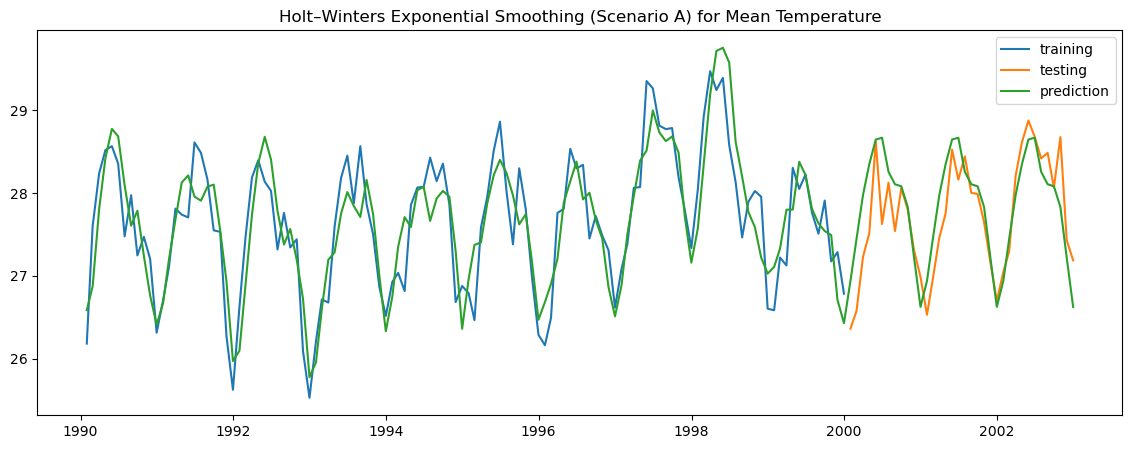

In [69]:
# Exponential Smoothing Model for Mean Temperature(Scenario A)

target = 'Mean Temperature (°C)'  

train1 = train_10y[target]
test1 = test_data_3y[target]

es_model = HWES(train1, seasonal_periods=12, trend='add', seasonal='add', damped_trend=True).fit()

#
pred1 = es_model.predict(start=train1.index[0], end=test1.index[-1])

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train1, label='training')
ax.plot(test1, label='testing')
ax.plot(pred1, label='prediction')
plt.legend()
plt.title('Holt–Winters Exponential Smoothing (Scenario A) for Mean Temperature')
plt.show()

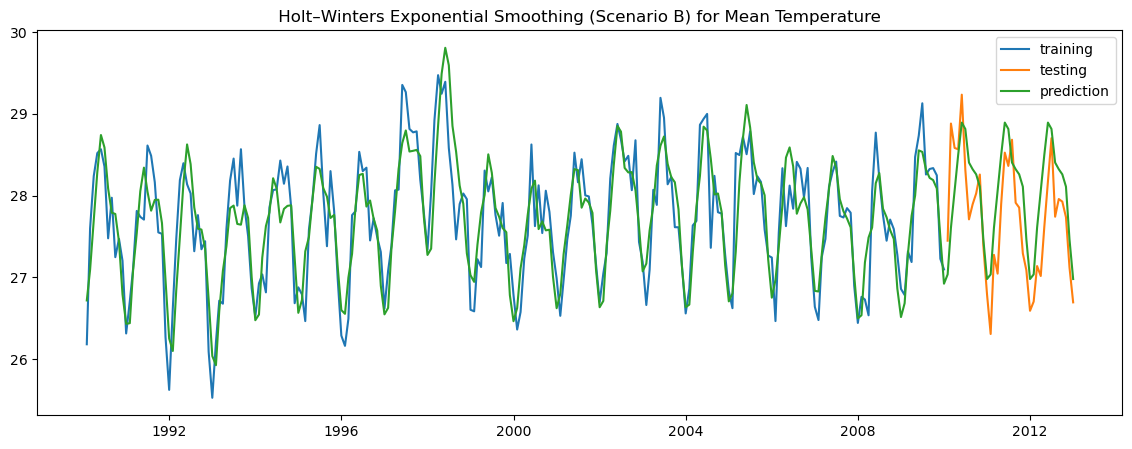

In [71]:
# Exponential Smoothing Model (Scenario B)

train2 = train_20y[target]
test2 = test_data_3y2[target]

es_model = HWES(train2, seasonal_periods=12, trend='add', seasonal='add', damped_trend=True).fit()

#
pred2 = es_model.predict(start=train2.index[0], end=test2.index[-1])

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train2, label='training')
ax.plot(test2, label='testing')
ax.plot(pred2, label='prediction')
plt.legend(); plt.title(' Holt–Winters Exponential Smoothing (Scenario B) for Mean Temperature ')
plt.show()

In [73]:
#Evaluate Scenario A
mape_train = mean_absolute_percentage_error(train1, pred1.reindex(train1.index)) * 100
mape_test  = mean_absolute_percentage_error(test1,pred1.reindex(test1.index)) * 100
print(f'Model Mean Absolute Percentage Error on training data for Scenario A  is {mape_train:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data for Scenario A  is {mape_test:.2f}%')

Model Mean Absolute Percentage Error on training data for Scenario A  is 1.26%
Model Mean Absolute Percentage Error on testing data for Scenario A  is 1.19%


In [75]:
# Evaluate scenario B
mape_train_b = mean_absolute_percentage_error(train2, pred2.reindex(train2.index)) * 100
mape_test_b= mean_absolute_percentage_error(test2, pred2.reindex(test2.index)) * 100
print(f'Model Mean Absolute Percentage Error on training data for Scenario B is {mape_train_b:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data Scenario B is {mape_test_b:.2f}%')


Model Mean Absolute Percentage Error on training data for Scenario B is 1.15%
Model Mean Absolute Percentage Error on testing data Scenario B is 1.71%


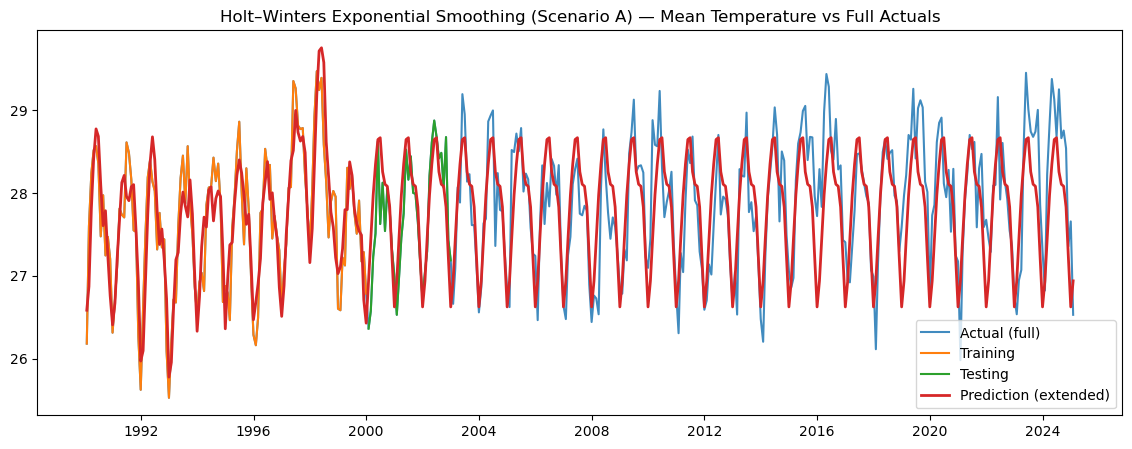

In [101]:
# Exponential Smoothing Model for Mean Temperature (Scenario A) — extend forecast & overlay full actuals

target = 'Mean Temperature (°C)'
train1 = train_10y[target]
test1  = test_data_3y[target]

# Fit HWES
es_model = HWES(train1, seasonal_periods=12, trend='add', seasonal='add', damped_trend=True).fit()

# Full actual series & extended prediction to latest month
y_all = df_monthly_1990[target]
pred1_long = es_model.predict(start=train1.index[0], end=y_all.index.max())

# Plot
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(y_all,      label='Actual (full)', alpha=0.85)
ax.plot(train1,     label='Training')
ax.plot(test1,      label='Testing')
ax.plot(pred1_long, label='Prediction (extended)', linewidth=2)
plt.legend()
plt.title('Holt–Winters Exponential Smoothing (Scenario A) — Mean Temperature vs Full Actuals')
plt.show()


In [105]:
# Mean Temperature (Scenario A) — MAPE on test and future


# Full actual series for temperature
y_all_T = df_monthly_1990['Mean Temperature (°C)']

# Test (2000–2002)
pred_te_T = pred1_long.reindex(test1.index)
mape_test_T = mean_absolute_percentage_error(test1, pred_te_T) * 100

# Extended future (2003+)
future_idx_T = y_all_T.loc['2003':].index
pred_ext_T   = pred1_long.reindex(future_idx_T)
mape_ext_T   = mean_absolute_percentage_error(y_all_T.loc['2003':], pred_ext_T) * 100

print(f"Test  (2000–2002)  — MAPE {mape_test_T:.2f}%")
print(f"Future (2003–{y_all_T.index.max().strftime('%Y-%m')}) — MAPE {mape_ext_T:.2f}%")


Test  (2000–2002)  — MAPE 1.19%
Future (2003–2025-01) — MAPE 1.39%


## Rainfall

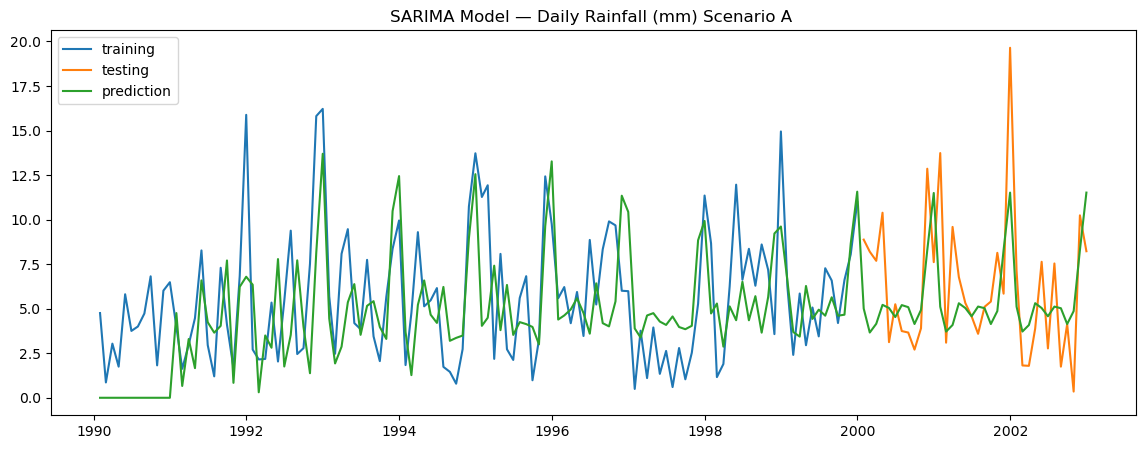

In [185]:
#SARIMA Model Scenario A
target2 = 'Daily Rainfall Total (mm)'
train_ra = train_10y[target2]
test_ra = test_data_3y[target2]

# Reuse train_data / test_data from above; they are DataFrames with one column
sarima_model = SARIMAX(train_ra, order=(1,0,1), seasonal_order=(1,1,1,12)).fit()
pred_a   = sarima_model.get_prediction(start=train_ra.index[0], end=test_ra.index[-1]).predicted_mean

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_ra, label='training')
ax.plot(test_ra,  label='testing')
ax.plot(pred_a, label='prediction')
plt.legend()
plt.title('SARIMA Model — Daily Rainfall (mm) Scenario A ')
plt.show()



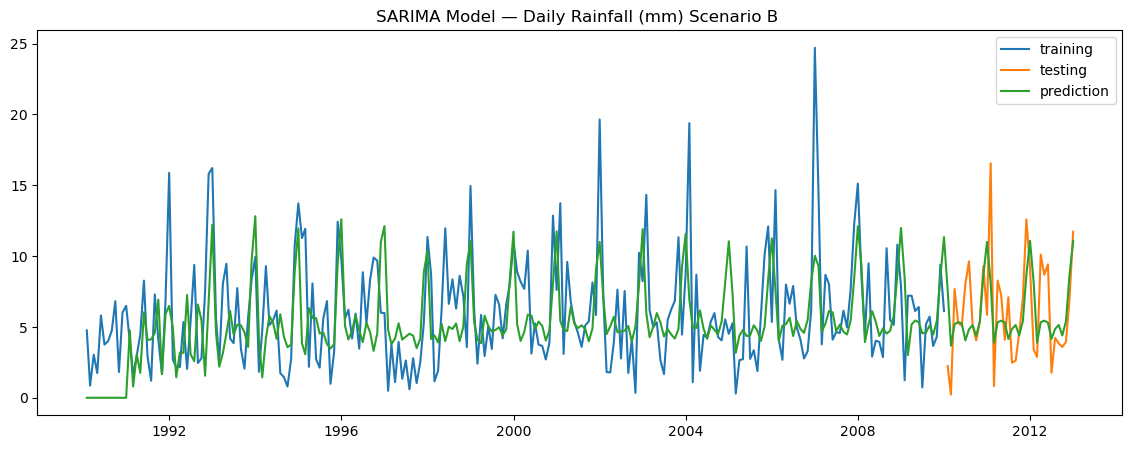

In [187]:
#Scenario B
target2 = 'Daily Rainfall Total (mm)'
train_rb = train_20y[target2]
test_rb = test_data_3y2[target2]

# Reuse train_data / test_data from above; they are DataFrames with one column
sarima_model = SARIMAX(train_rb, order=(1,0,1), seasonal_order=(1,1,1,12)).fit()
pred_b   = sarima_model.get_prediction(start=train_rb.index[0], end=test_rb.index[-1]).predicted_mean

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_rb, label='training')
ax.plot(test_rb,  label='testing')
ax.plot(pred_b, label='prediction')
plt.legend()
plt.title('SARIMA Model — Daily Rainfall (mm) Scenario B ')
plt.show()



In [111]:
train_ra


1990-01-31     4.754839
1990-02-28     0.860714
1990-03-31     3.038710
1990-04-30     1.746667
1990-05-31     5.809677
                ...    
1999-08-31     6.580645
1999-09-30     4.196667
1999-10-31     6.612903
1999-11-30     8.050000
1999-12-31    10.983871
Freq: ME, Name: Daily Rainfall Total (mm), Length: 120, dtype: float64

In [133]:
# MAE for Scenario A
mae_train = mean_absolute_error(train_ra, pred_a.reindex(train_ra.index))
mae_test = mean_absolute_error(test_ra, pred_a.reindex(test_ra.index))
print(f'Model Mean Absolute Error on training data: {mae_train:.2f}')
print(f'Model Mean Absolute Error on testing data: {mae_test:.2f}')


Model Mean Absolute Error on training data: 2.84
Model Mean Absolute Error on testing data: 2.62


In [167]:
# MAE for Scenario B
mae_trainb = mean_absolute_error(train_rb, pred_b.reindex(train_rb.index))
mae_testb = mean_absolute_error(test_rb, pred_b.reindex(test_rb.index))

print(f'Model Mean Absolute Error on training data: {mae_trainb:.2f}')
print(f'Model Mean Absolute Error on testing data: {mae_testb:.2f}')


Model Mean Absolute Error on training data: 2.77
Model Mean Absolute Error on testing data: 2.39


In [143]:
# using brute force. let computer do the hard work.
# use for loop
# loop thru p = [0, 1,2]
# loop thru q = [0, 1,2]


#scenario A for rain fall
results = []
for p in range(3):
    for q in range(3):
        for P in range(3):
            for Q in range(3):
                    # try d=0, D=1; monthly seasonality s=12
                    sarima_model_ra = SARIMAX(train_ra,order=(p,0,q),seasonal_order=(P,1,Q,12)).fit(disp=False)
                    pred_ra = sarima_model_ra.get_prediction(start=train_ra.index[0],end=test_ra.index[-1]).predicted_mean

                    # to evaluate model (align indices; no hard-coded dates)
                    mae_train_ra = mean_absolute_error(train_ra, pred_ra.reindex(train_ra.index))
                    mae_test_ra  = mean_absolute_error(test_ra,  pred_ra.reindex(test_ra.index))

                    print(f'{p},{q},{P},{Q} | AIC={sarima_model_ra.aic:.1f} '
                          f'| MAE train for A ={mae_train_ra:.2f} | MAE test for A={mae_test_ra:.2f}')
                    warnings.filterwarnings('ignore') # Hides all warnings
                    # store into a dict and append to list
                    results.append({
                        'p': p, 'q': q, 'P': P, 'Q': Q,
                        'aic': sarima_model_ra.aic,
                        'bic': sarima_model_ra.bic,
                        'mae_train': mae_train_ra,
                        'mae_test': mae_test_ra
                   
                    }) 


0,0,0,0 | AIC=627.8 | MAE train for A =3.61 | MAE test for A=2.84
0,0,0,1 | AIC=577.4 | MAE train for A =2.87 | MAE test for A=2.61
0,0,0,2 | AIC=579.4 | MAE train for A =2.87 | MAE test for A=2.61
0,0,1,0 | AIC=601.0 | MAE train for A =3.16 | MAE test for A=2.99
0,0,1,1 | AIC=579.4 | MAE train for A =2.87 | MAE test for A=2.61
0,0,1,2 | AIC=580.8 | MAE train for A =2.86 | MAE test for A=2.57
0,0,2,0 | AIC=590.0 | MAE train for A =2.97 | MAE test for A=2.79
0,0,2,1 | AIC=581.2 | MAE train for A =2.86 | MAE test for A=2.58
0,0,2,2 | AIC=582.5 | MAE train for A =2.84 | MAE test for A=2.52
0,1,0,0 | AIC=617.6 | MAE train for A =3.50 | MAE test for A=2.99
0,1,0,1 | AIC=571.5 | MAE train for A =2.84 | MAE test for A=2.61
0,1,0,2 | AIC=573.4 | MAE train for A =2.83 | MAE test for A=2.62
0,1,1,0 | AIC=592.5 | MAE train for A =3.03 | MAE test for A=3.05
0,1,1,1 | AIC=573.4 | MAE train for A =2.83 | MAE test for A=2.62
0,1,1,2 | AIC=574.7 | MAE train for A =2.81 | MAE test for A=2.57
0,1,2,0 | 

In [147]:
# Rank best paramer for scenario A
results_ra_df = pd.DataFrame(results)
ranked_ra = results_ra_df.sort_values(['mae_test','aic'], ascending=[True, True], na_position='last')

print("Top candidates for Scenario A(best first):")
print(ranked_ra.head(10))

Top candidates for Scenario A(best first):
    p  q  P  Q         aic         bic  mae_train  mae_test
8   0  0  2  2  582.547452  595.958108   2.839337  2.518930
80  2  2  2  2  582.013159  606.152340   2.784500  2.558083
44  1  1  2  2  578.697028  597.471947   2.813449  2.561331
26  0  2  2  2  578.697108  597.472027   2.813473  2.561352
17  0  1  2  2  576.697299  592.790087   2.813561  2.561483
71  2  1  2  2  580.627784  602.084834   2.807893  2.562133
77  2  2  1  2  580.019957  601.477006   2.785269  2.562820
53  1  2  2  2  580.370190  601.827240   2.800558  2.563101
50  1  2  1  2  578.372462  597.147381   2.800929  2.565752
62  2  0  2  2  578.961204  597.736123   2.819155  2.565857


In [153]:
# using brute force. let computer do the hard work.
# use for loop
# loop thru p = [0, 1, 2] 
# loop thru q = [0, 1, 2]
# for P, Q try on your own (here 0/1); monthly seasonal period = 12

# Scenario B for rainfall
results_rb = []
for p in range(3):
    for q in range(3):
        for P in range(3):
            for Q in range(3):
                    # try d=0, D=1; monthly seasonality s=12
                    sarima_model_rb = SARIMAX(train_rb,order=(p,0,q),seasonal_order=(P,1,Q,12)).fit(disp=False)
                    pred_rb = sarima_model_rb.get_prediction(start=train_rb.index[0],end=test_rb.index[-1]).predicted_mean

                    # to evaluate model (align indices; no hard-coded dates)
                    mae_train_rb = mean_absolute_error(train_rb, pred_rb.reindex(train_rb.index))
                    mae_test_rb  = mean_absolute_error(test_rb,  pred_rb.reindex(test_rb.index))

                    print(f'{p},{q},{P},{Q} | AIC={sarima_model_rb.aic:.1f} '
                          f'| MAE train for B ={mae_train_rb:.2f} | MAE test for B={mae_test_rb:.2f}')

                    # store into a dict and append to list
                    results_rb.append({
                        'p': p, 'q': q, 'P': P, 'Q': Q,
                        'aic': sarima_model_rb.aic,
                        'bic': sarima_model_rb.bic,
                        'mae_train': mae_train_rb,
                        'mae_test': mae_test_rb
                    }) 

0,0,0,0 | AIC=1347.5 | MAE train for B =3.67 | MAE test for B=2.79
0,0,0,1 | AIC=1228.8 | MAE train for B =2.79 | MAE test for B=2.42
0,0,0,2 | AIC=1230.7 | MAE train for B =2.79 | MAE test for B=2.42
0,0,1,0 | AIC=1297.7 | MAE train for B =3.25 | MAE test for B=2.68
0,0,1,1 | AIC=1230.7 | MAE train for B =2.79 | MAE test for B=2.42
0,0,1,2 | AIC=1229.8 | MAE train for B =2.78 | MAE test for B=2.43
0,0,2,0 | AIC=1264.8 | MAE train for B =2.97 | MAE test for B=2.57
0,0,2,1 | AIC=1230.4 | MAE train for B =2.76 | MAE test for B=2.46
0,0,2,2 | AIC=1231.2 | MAE train for B =2.76 | MAE test for B=2.46
0,1,0,0 | AIC=1348.3 | MAE train for B =3.66 | MAE test for B=2.80
0,1,0,1 | AIC=1229.3 | MAE train for B =2.78 | MAE test for B=2.41
0,1,0,2 | AIC=1231.3 | MAE train for B =2.78 | MAE test for B=2.41
0,1,1,0 | AIC=1296.8 | MAE train for B =3.22 | MAE test for B=2.67
0,1,1,1 | AIC=1231.3 | MAE train for B =2.78 | MAE test for B=2.41
0,1,1,2 | AIC=1230.4 | MAE train for B =2.76 | MAE test for B=

In [155]:
#Rank the best parameter for Scenario B
results_rb_df = pd.DataFrame(results_rb)
ranked_rb = results_rb_df.sort_values(['mae_test','aic'], ascending=[True, True], na_position='last')

print("Top candidates for Scenario B(best first):")
print(ranked_rb.head(10))

Top candidates for Scenario B(best first):
    p  q  P  Q          aic          bic  mae_train  mae_test
65  2  1  0  2  1234.202914  1254.778988   2.771146  2.390736
47  1  2  0  2  1234.189662  1254.765736   2.771501  2.390842
56  2  0  0  2  1232.419936  1249.566664   2.777370  2.390970
38  1  1  0  2  1232.261218  1249.407946   2.768995  2.391333
67  2  1  1  1  1234.215380  1254.791454   2.771213  2.392477
49  1  2  1  1  1234.202723  1254.778797   2.771550  2.392518
58  2  0  1  1  1232.431067  1249.577796   2.777511  2.392573
40  1  1  1  1  1232.270296  1249.417024   2.769216  2.392800
20  0  2  0  2  1232.616343  1249.763071   2.779433  2.393326
22  0  2  1  1  1232.625611  1249.772339   2.779525  2.394779


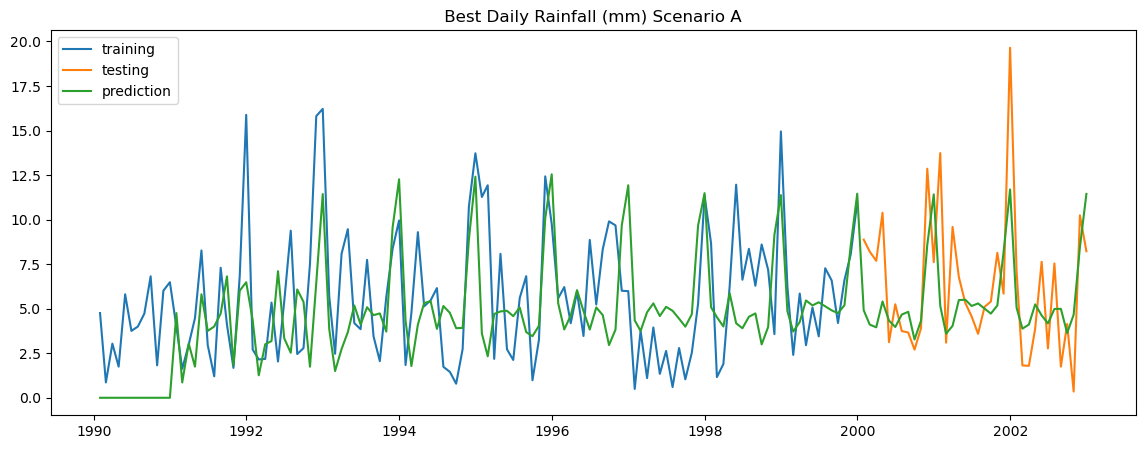

In [181]:
#based on chosen parameters
#SARIMA Model Scenario A
target2 = 'Daily Rainfall Total (mm)'
train_ra = train_10y[target2]
test_ra = test_data_3y[target2]

# Reuse train_data / test_data from above; they are DataFrames with one column
sarima_model_besta = SARIMAX(train_ra, order=(0,0,0), seasonal_order=(2,1,2,12)).fit()
pred_besta   = sarima_model_besta.get_prediction(start=train_ra.index[0], end=test_ra.index[-1]).predicted_mean

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_ra, label='training')
ax.plot(test_ra,  label='testing')
ax.plot(pred_besta, label='prediction')
plt.legend()
plt.title(' Best Daily Rainfall (mm) Scenario A ')
plt.show()



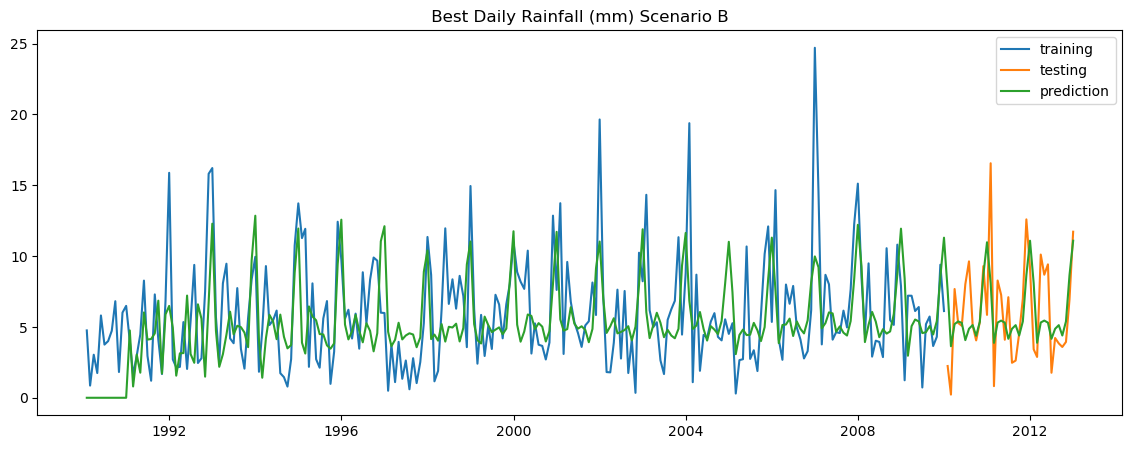

In [159]:
#based on chosen parameters
#SARIMA Model Scenario B
target2 = 'Daily Rainfall Total (mm)'
train_rb = train_20y[target2]
test_rb = test_data_3y2[target2]

# Reuse train_data / test_data from above; they are DataFrames with one column
sarima_model_bestb = SARIMAX(train_rb, order=(2,0,1), seasonal_order=(0,1,2,12)).fit()
pred_bestb   = sarima_model_bestb.get_prediction(start=train_rb.index[0], end=test_rb.index[-1]).predicted_mean

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_rb, label='training')
ax.plot(test_rb,  label='testing')
ax.plot(pred_bestb, label='prediction')
plt.legend()
plt.title(' Best Daily Rainfall (mm) Scenario B ')
plt.show()



In [163]:
mae_train_besta = mean_absolute_error(train_ra, pred_besta.reindex(train_ra.index))
mae_test_besta = mean_absolute_error(test_ra, pred_besta.reindex(test_ra.index))
print(f'Model Mean Absolute Error on training data for Scenario A is {mae_train_besta:.2f}')
print(f'Model Mean Absolute  Error on testing data for Scenario A  is {mae_test_besta:.2f}')
mae_train_bestb = mean_absolute_error(train_rb, pred_bestb.reindex(train_rb.index))
mae_test_bestb = mean_absolute_error(test_rb, pred_bestb.reindex(test_rb.index))
print(f'Model Mean Absolute Error on training data for Scenario B is {mae_train_bestb:.2f}')
print(f'Model Mean AbsoluteError on testing data for Scenario B is {mae_test_bestb:.2f}')

Model Mean Absolute Error on training data for Scenario A is 2.84
Model Mean Absolute  Error on testing data for Scenario A  is 2.52
Model Mean Absolute Error on training data for Scenario B is 2.77
Model Mean AbsoluteError on testing data for Scenario B is 2.39


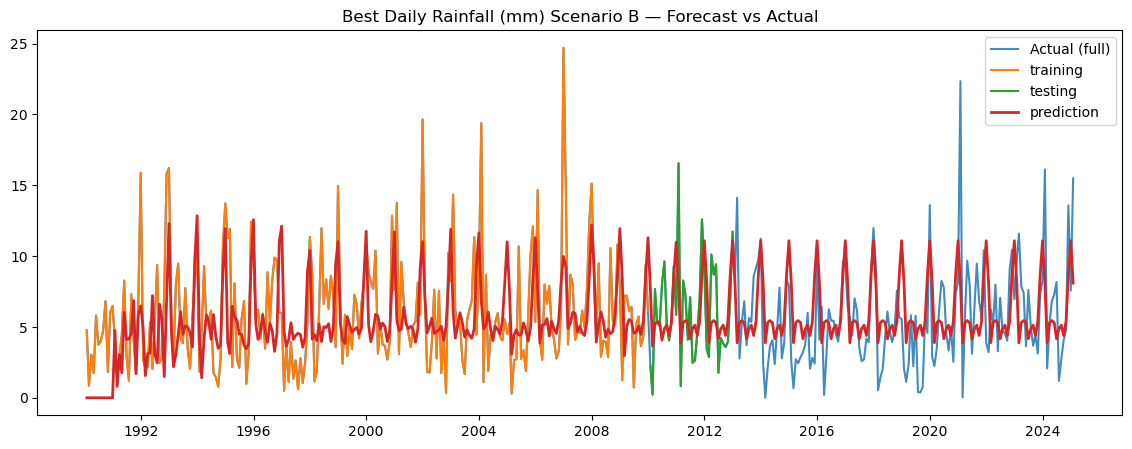

In [179]:
#based on chosen parameters
#SARIMA Model Scenario B
target2 = 'Daily Rainfall Total (mm)'


# Fit model
sarima_model_bestb = SARIMAX(train_rb, order=(2,0,1), seasonal_order=(0,1,2,12)).fit()

# Extend prediction to the latest available month and overlay actuals
y_all = df_monthly_1990[target2]
pred_bestb = sarima_model_bestb.get_prediction(start=train_rb.index[0], end=y_all.index.max()).predicted_mean

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(y_all,      label='Actual (full)', alpha=0.85)
ax.plot(train_rb,   label='training')
ax.plot(test_rb,    label='testing')
ax.plot(pred_bestb, label='prediction', linewidth=2)
plt.legend()
plt.title('Best Daily Rainfall (mm) Scenario B — Forecast vs Actual')
plt.show()


In [173]:
# Test (2000–2002)
pred_tebb = pred_bestb.reindex(test_rb.index)
mae_testbb  = mean_absolute_error(test_rb, pred_tebb)

# Extended future (2003+)
future_idx = y_all.loc['2003':].index
pred_extb   = pred_bestb.reindex(future_idx)
mae_extb   = mean_absolute_error(y_all.loc['2003':], pred_extb)

print(f'Test  (2000–2002)  — MAE {mae_testbb:.2f} ')
print(f'Future (2003–{y_all.index.max().strftime('%Y-%m')}) — MAE {mae_extb:.2f} ')


Test  (2000–2002)  — MAE 2.39 
Future (2003–2025-01) — MAE 2.50 
